In [ ]:
Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not



In [ ]:
# importing libraries

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report

In [ ]:
# reading file

In [2]:
data=pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
label_encoder = preprocessing.LabelEncoder()
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status'])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,2,68833,50047,10,YES
1,YES,0,33700,134075,18,YES
2,NO,1,36925,160205,30,YES
3,YES,2,50190,193264,15,YES
4,NO,1,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,0,76340,39492,7,YES
596,YES,0,69967,55369,2,YES
597,NO,0,47334,154058,0,YES
598,YES,1,98592,180083,17,NO


In [4]:
data['Undergrad']=np.where(data['Undergrad'].str.contains('YES'),1,0)
data['Urban']=np.where(data['Urban'].str.contains('YES'),1,0)
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [5]:
data[data['Taxable.Income']<11000]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
19,0,2,10987,126953,30,1
28,1,2,10379,128766,5,1
36,1,1,10163,193995,5,1
58,1,2,10870,158047,15,0
68,0,2,10150,139642,5,0
79,0,0,10329,140885,7,1
94,0,2,10348,122705,6,1
196,1,1,10933,28410,21,0
233,0,1,10003,63701,19,1
301,1,1,10900,39797,11,0


In [6]:
np.min(data['Taxable.Income'])

10003

In [7]:
np.max(data['Taxable.Income'])

99619

In [8]:
new=pd.cut(data['Taxable.Income'],bins=[10003,30000,99619],labels=['Risky','Free'])
new

0      Free
1      Free
2      Free
3      Free
4      Free
       ... 
595    Free
596    Free
597    Free
598    Free
599    Free
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Free']

In [9]:
x=pd.Series(new)
x

0      Free
1      Free
2      Free
3      Free
4      Free
       ... 
595    Free
596    Free
597    Free
598    Free
599    Free
Name: Taxable.Income, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Free']

In [10]:
data['Tax_Cat']=x
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Tax_Cat
0,0,2,68833,50047,10,1,Free
1,1,0,33700,134075,18,1,Free
2,0,1,36925,160205,30,1,Free
3,1,2,50190,193264,15,1,Free
4,0,1,81002,27533,28,0,Free
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Free
596,1,0,69967,55369,2,1,Free
597,0,0,47334,154058,0,1,Free
598,1,1,98592,180083,17,0,Free


In [11]:
df=data.drop(['Taxable.Income'],axis=1)
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_Cat
0,0,2,50047,10,1,Free
1,1,0,134075,18,1,Free
2,0,1,160205,30,1,Free
3,1,2,193264,15,1,Free
4,0,1,27533,28,0,Free
...,...,...,...,...,...,...
595,1,0,39492,7,1,Free
596,1,0,55369,2,1,Free
597,0,0,154058,0,1,Free
598,1,1,180083,17,0,Free


In [12]:
df['Tax_Cat']=np.where(df['Tax_Cat'].str.contains('Free'),0,1)
df

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Tax_Cat
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [13]:
x=df.iloc[:,0:5]
y=df['Tax_Cat']
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Tax_Cat, Length: 600, dtype: int32

In [15]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42) 

In [16]:
model= DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

In [17]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
108,1,1,120894,10,1
272,0,2,126488,1,1
599,0,0,158137,16,0
479,1,1,68995,21,0
436,0,0,158057,4,1
...,...,...,...,...,...
71,0,2,105680,22,0
106,1,2,58535,20,1
270,0,1,130680,5,0
435,0,0,111774,4,1


In [18]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 108 to 102
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        420 non-null    int32
 1   Marital.Status   420 non-null    int32
 2   City.Population  420 non-null    int64
 3   Work.Experience  420 non-null    int64
 4   Urban            420 non-null    int32
dtypes: int32(3), int64(2)
memory usage: 14.8 KB


In [19]:
y_train

108    0
272    0
599    0
479    0
436    0
      ..
71     0
106    1
270    0
435    0
102    0
Name: Tax_Cat, Length: 420, dtype: int32

In [20]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.4230769230769231, 0.875, 'X[2] <= 60294.5\nentropy = 0.731\nsamples = 420\nvalue = [334, 86]'),
 Text(0.15384615384615385, 0.625, 'X[3] <= 6.5\nentropy = 0.611\nsamples = 93\nvalue = [79, 14]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.23076923076923078, 0.375, 'X[3] <= 24.5\nentropy = 0.679\nsamples = 78\nvalue = [64, 14]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.796\nsamples = 54\nvalue = [41, 13]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.25\nsamples = 24\nvalue = [23, 1]'),
 Text(0.6923076923076923, 0.625, 'X[1] <= 0.5\nentropy = 0.761\nsamples = 327\nvalue = [255, 72]'),
 Text(0.5384615384615384, 0.375, 'X[3] <= 23.5\nentropy = 0.634\nsamples = 100\nvalue = [84, 16]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.691\nsamples = 81\nvalue = [66, 15]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.297\nsamples = 19\nvalue = [18, 1]'),
 Text(0.8461538461538461, 0.375, 'X[2] <= 65532.0\nentropy = 0.806\nsamples

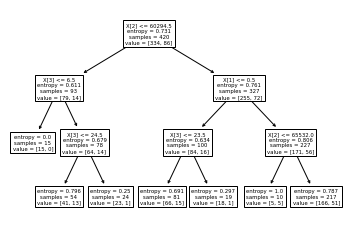

In [21]:
tree.plot_tree(model)

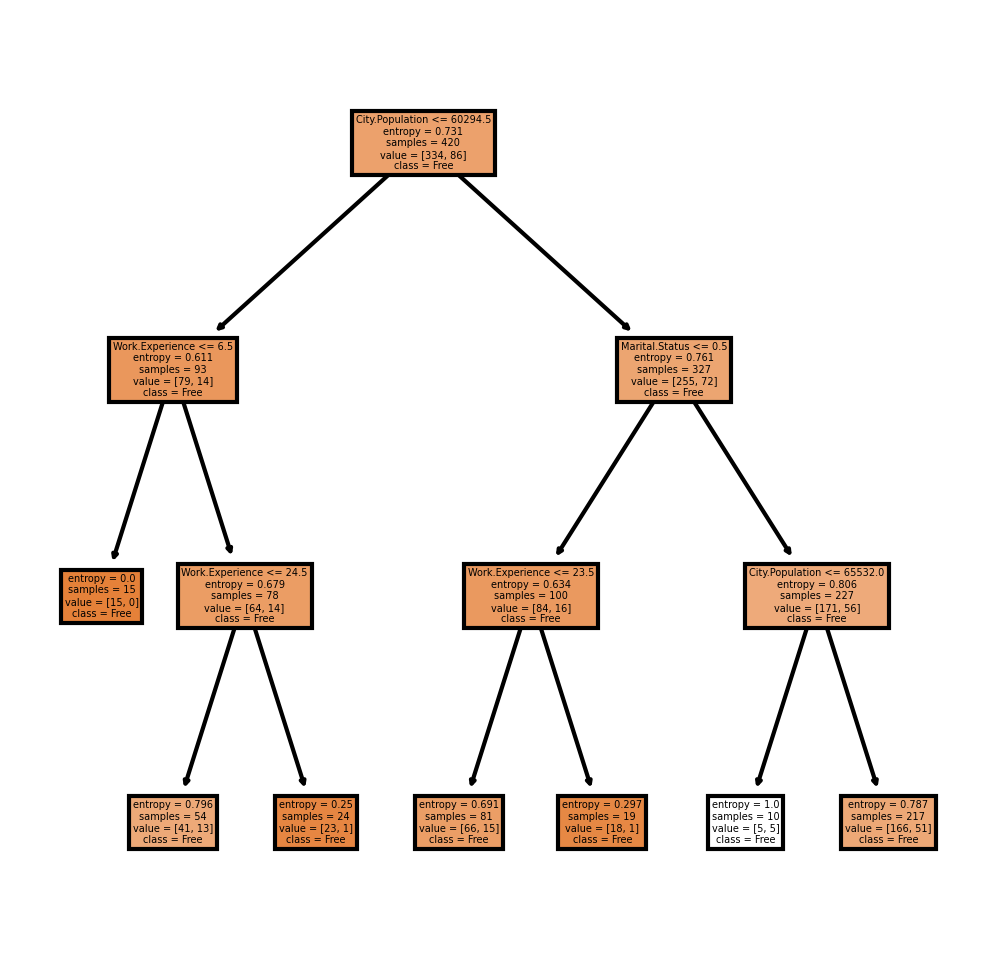

In [22]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Free', 'Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [23]:
model.feature_importances_

array([0.        , 0.14486041, 0.24643119, 0.6087084 , 0.        ])

In [24]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Work.Experience    0.608708
City.Population    0.246431
Marital.Status     0.144860
Undergrad          0.000000
Urban              0.000000
dtype: float64

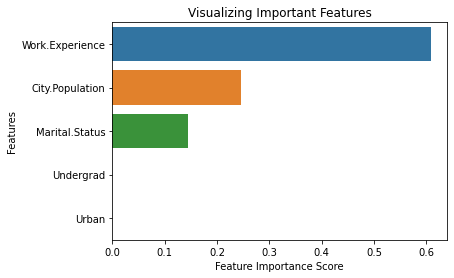

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [26]:
pred=model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [27]:
np.mean(pred==y_test)

0.7944444444444444

In [28]:
pd.crosstab(y_test,pred)

col_0,0
Tax_Cat,
0,143
1,37


## CART

In [29]:
model1= DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
model1.feature_importances_

array([0.13618173, 0.17120392, 0.69261436, 0.        , 0.        ])

In [31]:
preds=model1.predict(x_test)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [32]:
np.mean(y_test==preds)

0.7888888888888889

In [33]:
pd.crosstab(y_test,preds)

col_0,0,1
Tax_Cat,,
0,142,1
1,37,0


[Text(0.5, 0.875, 'X[2] <= 60294.5\ngini = 0.326\nsamples = 420\nvalue = [334, 86]'),
 Text(0.25, 0.625, 'X[0] <= 0.5\ngini = 0.256\nsamples = 93\nvalue = [79, 14]'),
 Text(0.125, 0.375, 'X[1] <= 1.5\ngini = 0.153\nsamples = 48\nvalue = [44, 4]'),
 Text(0.0625, 0.125, 'gini = 0.213\nsamples = 33\nvalue = [29, 4]'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.375, 0.375, 'X[2] <= 27659.0\ngini = 0.346\nsamples = 45\nvalue = [35, 10]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4375, 0.125, 'gini = 0.325\nsamples = 44\nvalue = [35, 9]'),
 Text(0.75, 0.625, 'X[2] <= 64532.5\ngini = 0.343\nsamples = 327\nvalue = [255, 72]'),
 Text(0.625, 0.375, 'X[2] <= 63885.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.5625, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.375, 'X[1] <= 0.5\ngini = 0.335\nsamples = 319\nvalue = [251, 68]'),
 Text(0.8125

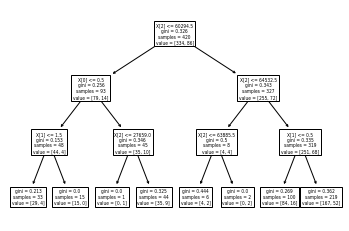

In [34]:
tree.plot_tree(model1)

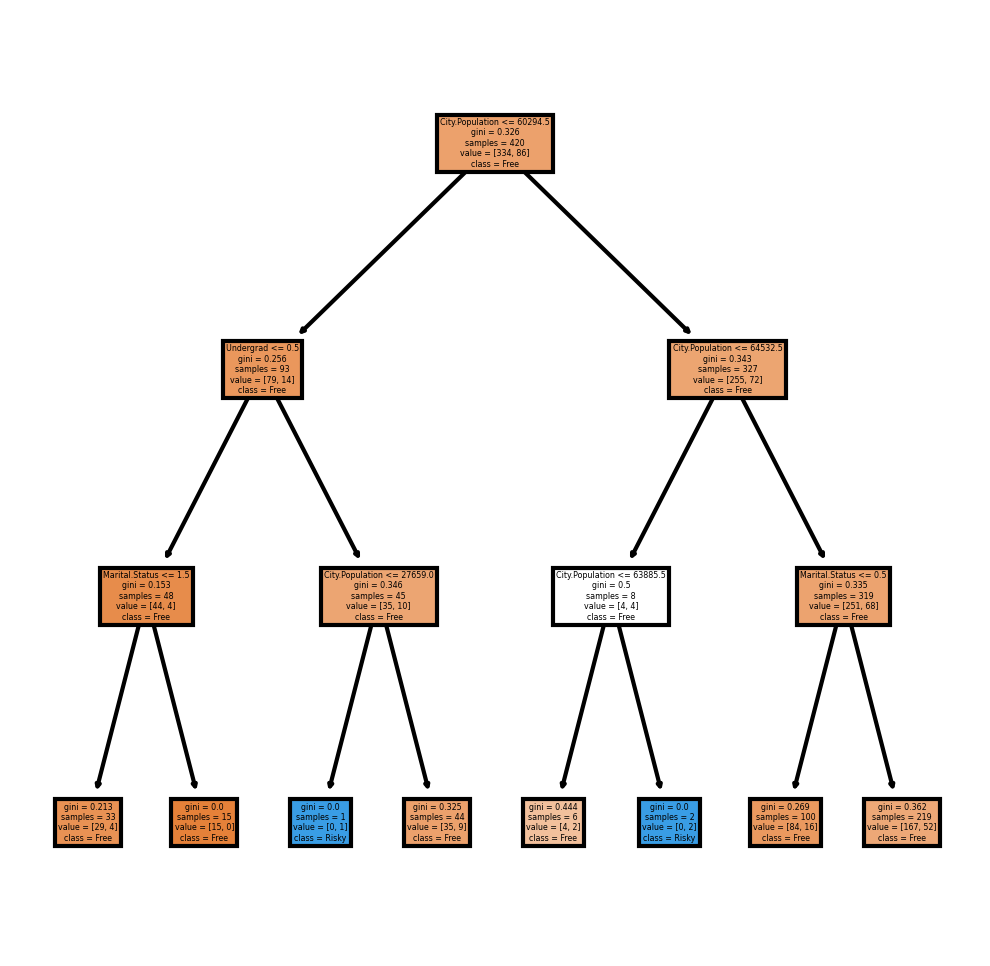

In [35]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['Free','Risky' ]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model1,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [36]:
feature_imp1= pd.Series(model1.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp1

City.Population    0.692614
Marital.Status     0.171204
Undergrad          0.136182
Work.Experience    0.000000
Urban              0.000000
dtype: float64

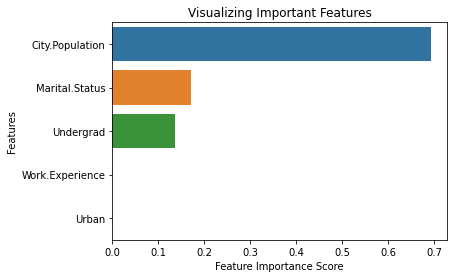

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x=feature_imp1, y=feature_imp1.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## CART(Regression)

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
array=df.values
array

array([[     0,      2,  50047,     10,      1,      0],
       [     1,      0, 134075,     18,      1,      0],
       [     0,      1, 160205,     30,      1,      0],
       ...,
       [     0,      0, 154058,      0,      1,      0],
       [     1,      1, 180083,     17,      0,      0],
       [     0,      0, 158137,     16,      0,      0]], dtype=int64)

In [40]:
X=array[:,0:4]
Y=array[:,5]
X

array([[     0,      2,  50047,     10],
       [     1,      0, 134075,     18],
       [     0,      1, 160205,     30],
       ...,
       [     0,      0, 154058,      0],
       [     1,      1, 180083,     17],
       [     0,      0, 158137,     16]], dtype=int64)

In [41]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.39, random_state=42)

In [43]:
model3=DecisionTreeRegressor(max_depth=3)
model3.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=3)

In [44]:
model3.score(X_train,Y_train)

0.05202987961285688

In [45]:
model3.score(X_test,Y_test)

-0.08076106311156295

In [46]:
df['Tax_Cat'].value_counts()

0    477
1    123
Name: Tax_Cat, dtype: int64